<a href="https://colab.research.google.com/github/Minhajul99/NLP/blob/main/NLP_with_Multiple_Algoritms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [3]:
dataset = pd.read_csv('drive/MyDrive/Data/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Cleaning the texts

In [4]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,len(dataset)):
  review =re.sub('[^a-zA-z]',' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Creating the Bag of Words model

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [23]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

## Training the LogisticRegression model on the Training set

In [24]:
from sklearn.linear_model import LogisticRegression
LRG = LogisticRegression(penalty='l1', C=0.2, solver='liblinear', random_state=0)
LRG.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Training the Random Froest Classifier model on the Training set

In [39]:
from sklearn.ensemble import RandomForestClassifier
RND = RandomForestClassifier(n_estimators = 42, criterion = 'entropy', max_depth=5, random_state = 0)
RND.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

## Predicting the Test set results

In [40]:
y_pred_GNB = GNB.predict(X_test)
y_pred_LRG = LRG.predict(X_test)
y_pred_RND = RND.predict(X_test)

## Making the Confusion Matrix & Showing The Accuracy


Accuracy for Naive Bayes: 73.00%


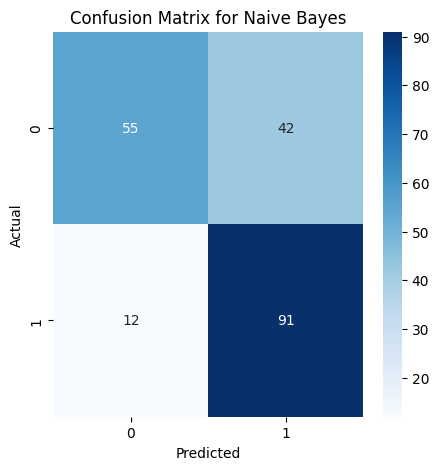

Accuracy for Logistic Regression: 77.50%


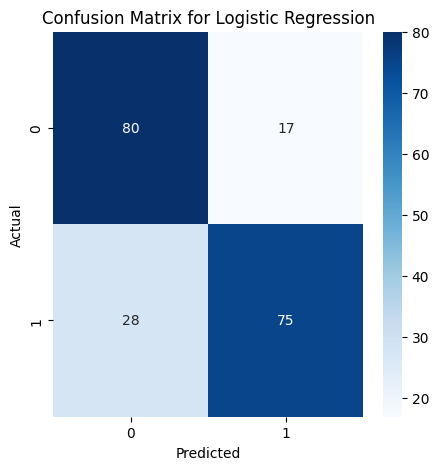

Accuracy for Random Forest Classifier: 76.50%


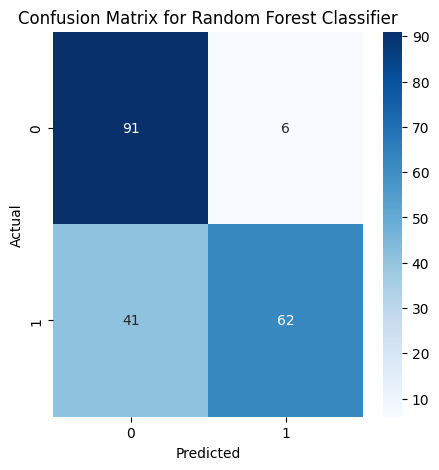

In [44]:
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f'Accuracy for {model_name}: {accuracy * 100:.2f}%')

    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate each model
evaluate_model(y_test, y_pred_GNB, 'Naive Bayes')
evaluate_model(y_test, y_pred_LRG, 'Logistic Regression')
evaluate_model(y_test, y_pred_RND, 'Random Forest Classifier')

##